In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = "C:/Users/Jenny/msu/hw/08real/Movies_2/"

In [3]:
f'{file_dir}wikipedia-movies.json'

'C:/Users/Jenny/msu/hw/08real/Movies_2/wikipedia-movies.json'

In [4]:
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [5]:
len(wiki_movies_raw)

7311

In [6]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [7]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [8]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [9]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [10]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [12]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
3641,False,"{'id': 171439, 'name': 'F/X Collection', 'post...",0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",NaN,9873,tt0089118,en,F/X,A movies special effects man is hired by a gov...,...,1986-02-07,20603715.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Murder by Illusion,F/X,False,6.4,91.0
10341,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",NaN,23703,tt0429177,en,The Thing About My Folks,Ben's dad Sam shows up one night with a note f...,...,2005-01-01,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Thing About My Folks,False,5.4,9.0
32350,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,41012,tt0118906,hu,Csinibaba,"The movie is set in the actual ""Ki Mit Tud?"" t...",...,1997-02-20,0.0,100.0,"[{'iso_639_1': 'hu', 'name': 'Magyar'}]",Released,NaN,Dollybirds,False,6.4,4.0
6257,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,43361,tt0044000,it,Lo sceicco bianco,"The first two days of a marriage. Ivan, a punc...",...,1952-09-20,0.0,86.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,A Very Funny Picture by Federico Fellini,The White Sheik,False,7.2,29.0
33173,False,NaN,3000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,38637,tt1180583,ta,Vaaranam Aayiram,"Surya is away at war as his father, Krisnan di...",...,2008-11-14,14000000.0,169.0,"[{'iso_639_1': 'ml', 'name': ''}, {'iso_639_1'...",Released,NaN,Vaaranam Aayiram,False,7.5,13.0


In [13]:
ratings.sample(n=7)

,userId,movieId,rating,timestamp
15139204,157514,33166,0.5,1208782261
22671603,235566,1398,2.0,856584696
7452090,76883,110730,3.0,1480533916
2876875,29953,300,4.0,982958673
2646718,27490,6541,3.5,1472364334
17165164,178199,63131,3.5,1501573638
18338761,190356,420,2.0,847116131


In [14]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# convert columns to a list to see all columns
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [16]:
# filter for only movies with a director and an IMDb link. Check if Director or Directed BY are keys in current dict.
# If director is listed then check that the dict has an IMDb link.
# remove no of episodes
wiki_movies = [movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
              and 'imdb_link'in movie
              and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [17]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [19]:
def clean_movie(movie):
    movie = dict(movie)    #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
            
            
    return movie

In [20]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [21]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [22]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [23]:
def clean_movie(movie):
    movie = dict(movie)    #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles in one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Directed by', 'Director')
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Length', 'Running time')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    change_column_name('Directed by', 'Director')
    change_column_name('Directed by', 'Director')
    
    
            
    return movie

In [24]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [25]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [26]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Edited by,Release date,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,David Stiven,"December 19, 1990",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [27]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Edited by', 694],
 ['Release date', 191],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Editor(s)', 6887],
 ['Original network', 6908],
 ['Original release', 6874],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [28]:
# get list of columns that have less than 90% null values
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * .9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Edited by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [29]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns
                        if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * .9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [30]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Edited by,Release date,Running time,...,Language,Budget,Box office,Director,Distributor,Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,English,$6 million,$2.7 million,James Foley,Avenue Pictures,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,"[English, Lao]",$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,English,$12 million,"$7,331,647",Woody Allen,Orion Pictures,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,"December 19, 1990",95 minutes,...,English,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [31]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Edited by                object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [32]:
box_office = wiki_movies_df['Box office'].dropna()
print(len(box_office))

5485


In [33]:
# find values in box office that are not strings
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [34]:
# update above call with  lambda function
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [35]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [36]:
# create regex to for box office 
form_one = r"\$\d+\.?\d*\s*[mb]illion"

In [37]:
# count how many values match form_one
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [38]:
# create another regex for box office
form_two = r'\$\d{1,3}(?:,\d{3})+'
# count values that match form two
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [39]:
# create boolean series to find box office values that do not match either form
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [40]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [41]:
# adjust forms
form_one = r"\$\s*\d+\.?\d*\s*[mb]illion"
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)'
box_office = box_office.str.replace(r'\$.*[---](?!a-z)', '$', regex=True)

C:\Users\Jenny\anaconda3\envs\PythonData\lib\site-packages\pandas\core\strings\object_array.py:160: FutureWarning: Possible set difference at position 6
  compiled = re.compile(pat, flags=flags)


In [42]:
# extract regex matches
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [43]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r"\$\s*\d+\.?\d*\s*milli?on", s, flags=re.IGNORECASE):
        
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        
        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value
    
    # if input is of the form $###.# billion
    elif re.match(r"\$\s*\d+\.?\d*\s*billi?on", s, flags=re.IGNORECASE):
        
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        
        # return value
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)
        
        # convert to float
        value = float(s)
        
        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [44]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [45]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [46]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [47]:
# create budget variable to start working with Budget, drop rows with no values
budget = wiki_movies_df['Budget'].dropna()

In [48]:
# convert lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [49]:
# remove any values between a dollar sign and a hyphen
budget = budget.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

C:\Users\Jenny\anaconda3\envs\PythonData\lib\site-packages\pandas\core\strings\object_array.py:160: FutureWarning: Possible set difference at position 6
  compiled = re.compile(pat, flags=flags)


In [50]:
# create boolean series to find budget values that do not match either form
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

110                     $5–7 million
136                          Unknown
196     $6.5–10 million [1] [Note 1]
204      60 million Norwegian Kroner
235                   $50–65 million
                    ...             
7062                $100–150 million
7066                $160–200 million
7067                $102–135 million
7068                  $39–50 million
7070                    €4.3 million
Name: Budget, Length: 231, dtype: object

In [51]:
# remove citation references
budget = budget.str.replace(r'\[\d+\]\s*', '', regex=True)
budget[~matches_form_one & ~matches_form_two]

110                    $5–7 million
136                         Unknown
196        $6.5–10 million [Note 1]
204     60 million Norwegian Kroner
235                  $50–65 million
                   ...             
7062               $100–150 million
7066               $160–200 million
7067               $102–135 million
7068                 $39–50 million
7070                   €4.3 million
Name: Budget, Length: 231, dtype: object

In [52]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [53]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [54]:
wiki_movies_df.head(15)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Edited by,Release date,Running time,...,Language,Director,Distributor,Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,English,Renny Harlin,20th Century Fox,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,English,James Foley,Avenue Pictures,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,"[English, Lao]",Roger Spottiswoode,TriStar Pictures,Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,English,Woody Allen,Orion Pictures,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,12000000.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,"December 19, 1990",95 minutes,...,English,John Cornell,Paramount Pictures,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,25000000.0
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",Jacques Haitkin,"[Claudia Finkle, Armond Leibowitz]","[March 22, 1990, (, 1990-03-22, )]",95 minutes,...,English,Larry Cohen,Triumph Releasing Corporation,Jay Chattaway,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",Epic Productions,Larry Cohen,tt0099026,NaN,NaN
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,NaN,NaN,"[Tom Hurwitz, Mathieu Roberts, Nesya Shapiro]","[Cathy Caplan, Thomas Haneke, Lawrence Silk]","[October 6, 1990, (, 1990-10-06, ), (, New Yor...",100 minutes,...,English,"[Barbara Kopple, Co-directors:, Cathy Caplan, ...",Prestige Films,Michael Small,"[Arthur Cohn, Barbara Kopple]","[Cabin Creek, Catholic Communication Campaign,...",NaN,tt0099028,NaN,NaN
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",NaN,NaN,"[March 8, 1991, (, 1991-03-08, )]",99 minutes,...,English,Cedric Sundstrom,Cannon Group,NaN,Ovidio G Assonitis,NaN,David Geeves,tt0101326,NaN,NaN
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990,https://www.imdb.com/title/tt0099037/,Andre's Mother,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",Bobby Bukowski,Jeffrey Wolf,"[March 7, 1990, (, 1990-03-07, )]",50 minutes,...,English,Deborah Reinisch,Public Broadcasting Service,Jonathan Sheffer,"[Sarah Green, Deborah Reinisch]",NaN,Terrence McNally,tt0099037,NaN,NaN
9,https://en.wikipedia.org/wiki/Angel_Town_(film),1990,https://www.imdb.

In [55]:
# create variable for non null values of release date in df and convert to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [56]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [57]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [58]:
wiki_movies_df['release_date'] = pd.to_datetime(
    release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], 
    infer_datetime_format=True)

In [59]:
# create variable for running time
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [60]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [61]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [62]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [63]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [64]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [65]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [66]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [67]:
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [68]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [69]:
wiki_movies_df.head(20)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Edited by,Release date,Country,...,Distributor,Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",United States,...,20th Century Fox,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0,1990-07-11,102.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,...,Avenue Pictures,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0,1990-05-17,114.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",United States,...,TriStar Pictures,Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0,1990-08-10,113.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",United States,...,Orion Pictures,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,12000000.0,1990-12-25,106.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,"December 19, 1990",US,...,Paramount Pictures,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,25000000.0,1990-12-19,95.0
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",Jacques Haitkin,"[Claudia Finkle, Armond Leibowitz]","[March 22, 1990, (, 1990-03-22, )]",United States,...,Triumph Releasing Corporation,Jay Chattaway,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",Epic Productions,Larry Cohen,tt0099026,NaN,NaN,1990-03-22,95.0
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,NaN,NaN,"[Tom Hurwitz, Mathieu Roberts, Nesya Shapiro]","[Cathy Caplan, Thomas Haneke, Lawrence Silk]","[October 6, 1990, (, 1990-10-06, ), (, New Yor...","[United States, United Kingdom]",...,Prestige Films,Michael Small,"[Arthur Cohn, Barbara Kopple]","[Cabin Creek, Catholic Communication Campaign,...",NaN,tt0099028,NaN,NaN,1990-10-06,100.0
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",NaN,NaN,"[March 8, 1991, (, 1991-03-08, )]","[United States, Lesotho]",...,Cannon Group,NaN,Ovidio G Assonitis,NaN,David Geeves,tt0101326,NaN,NaN,1991-03-08,99.0
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990,https://www.imdb.com/title/tt0099037/,Andre's Mother,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",Bobby Bukowski,Jeffrey Wolf,"[March 7, 1990, (, 1990-03-07, )]",United States,...,Public Broadcasting Service,Jonathan Sheffer,"[Sarah Green, Deborah Reinisch]",NaN,Terrence McNally,tt0099037,NaN,NaN,1990-03-07,50.0
9,https://en.wikipedia.org/wiki/Angel_Town_(film),1990,https://www.imdb.com/title/tt0099039/,Angel Town,NaN,"[Olivier Gruner

In [70]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [71]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [72]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [74]:
kaggle_metadata

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [75]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [76]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [77]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [78]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [79]:
kaggle_metadata.dtypes

belongs_to_collection     object
budget                     int32
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
dtype: object

In [80]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [81]:
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int32
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [82]:
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [83]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [84]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

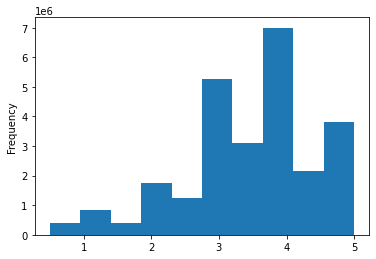

In [85]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [86]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [89]:
movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title_wiki',
 'Based on',
 'Starring',
 'Cinematography',
 'Edited by',
 'Release date',
 'Country',
 'Language',
 'Director',
 'Distributor',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id',
 'box_office',
 'budget_wiki',
 'release_date_wiki',
 'running_time',
 'belongs_to_collection',
 'budget_kaggle',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vote_average',
 'vote_count']

In [90]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle            drop wikipedia
# running_time             runtime                 keep kaggle; fill in zeros with wikipedia data
# budget_wiki              budget_kaggle           keep kaggle; fill in zeros with wikipedia data
# box_office               revenue                 keep kaggle; fill in zeros with wikipedia data
# release_date_wiki        release_date_kaggle     drop wikipedia
# Language                 original_language       drop wikipedia
# Production company(s)    production_companies    drop wikipedia

In [92]:
# review some titles from both wiki and kaggle
movies_df[['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [94]:
# review titles that don't match between wiki and kaggle
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [95]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Edited by,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

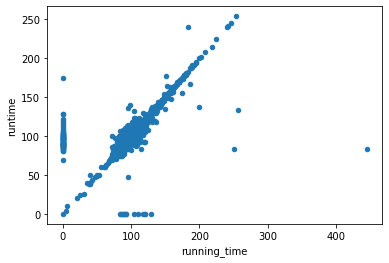

In [96]:
# compare running time v. runtime by filling missing values with zero and make a scatter plot
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

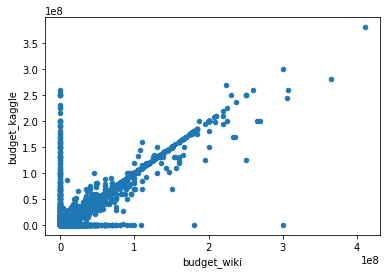

In [97]:
# compare budget_wiki v. budget_kaggle by filling missing values with zero and make a scatter plot
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

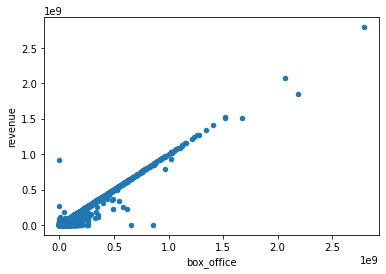

In [98]:
# make scatter plot of box office and revenue since they are both numeric
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

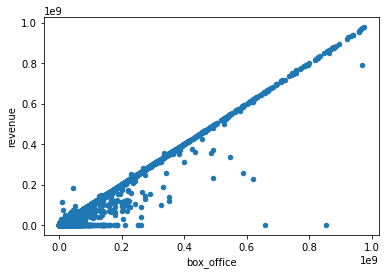

In [99]:
# review scatter plot for everything less than $1B in box_office
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

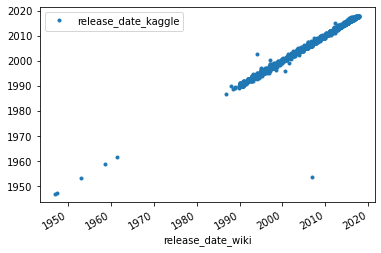

In [100]:
# create regular line plot to compare release date
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')


In [101]:
# investigate outlier in 2006
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Edited by,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,Joe Hutshing,"[December 8, 2006, (, 2006-12-08, )]",United States,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [102]:
# drop above row since it appears to have merged two different movies
# get the index of the row
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [103]:
# drop the row
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [104]:
# check for null values in release date
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Edited by,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
22,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",Peter Smokler,NaN,NaN,United States,...,1990-09-23,0.00,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Camp Cucamonga,False,4.70,9.00
24,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,NaN,NaN,NaN,NaN,NaN,United States,...,1990-04-21,0.00,26.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Drugs don't stand a chance against these guys!,Cartoon All-Stars to the Rescue,False,6.00,5.00
28,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",Geoffrey Schaaf,NaN,NaN,United States,...,1990-01-31,0.00,97.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Every year, Officer Donnelly goes to China Lak...",The China Lake Murders,False,0.00,0.00
186,https://en.wikipedia.org/wiki/Treasure_Island_...,1990,https://www.imdb.com/title/tt0100813/,Treasure Island,NaN,"[Charlton Heston, Christian Bale, Oliver Reed,...",Robert Steadman,NaN,NaN,UK / US,...,1990-06-08,0.00,131.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sail the high seas. Battle the pirates. Live t...,Treasure Island,False,5.60,36.00
330,https://en.wikipedia.org/wiki/Perfect_Harmony_...,1991,https://www.imdb.com/title/tt0102653/,Perfect Harmony,NaN,NaN,Robert D. Yeoman,NaN,NaN,United States,...,1991-03-31,0.00,89.00,[],Released,NaN,Perfect Harmony,False,3.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,NaN,"[Michael Madsen, Ron Livingston]",David Franco,NaN,NaN,United States,...,2003-01-01,0.00,103.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,44 Minutes: The North Hollywood Shoot-Out,False,6.40,17.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,NaN,"[Denmark, USA, UK]",...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3390,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,NaN,Bob Dylan,Mustapha Barat,NaN,NaN,NaN,...,2005-07-21,0.00,208.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bob Dylan. Songwriter. Rocker. Rebel. Legend.,No Direction Home: Bob Dylan,False,7.50,33.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,NaN,United States,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [105]:
# compare value counts of language
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                               5479
[English, Spanish]                      68
[English, French]                       35
[English, Japanese]                     25
[English, Russian]                      23
                                      ... 
[English, Greek, German, Italian]        1
[English, Russian, Serbo-Croatian]       1
[Mandarin Chinese, English]              1
[English, Spanish, Correguaje]           1
[English, Lao]                           1
Name: Language, Length: 197, dtype: int64

In [106]:
# convert list to tuple
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                                                                       5479
NaN                                                                            134
(English, Spanish)                                                              68
(English, French)                                                               35
(English, Japanese)                                                             25
                                                                              ... 
(Mandarin, English, Korean)                                                      1
(English, German, Italian, French, Finnish)                                      1
(English, French, Mandarin)                                                      1
(English, German, Czech, Norwegian, Romanian, Russian, Serbian, Ukrainian)       1
(English, French, Hebrew, Spanish, Arabic, Italian)                              1
Name: Language, Length: 198, dtype: int64

In [107]:
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
zh       4
pt       4
ja       4
hi       2
da       2
sv       1
ab       1
he       1
tr       1
ar       1
ko       1
ru       1
cn       1
Name: original_language, dtype: int64

In [108]:
# review production companies
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [109]:
# drop the wikipedia columns
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [110]:
movies_df.head()

,url,year,imdb_link,Based on,Starring,Cinematography,Edited by,Release date,Country,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,"December 19, 1990",US,John Cornell,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00


In [111]:
# create function to fill in missing data for a data pair and then drop redundant column
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [112]:
# run function
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Edited by,Release date,Country,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,"December 19, 1990",US,John Cornell,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,Soledad Salfate,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,Matt Friedman,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,Anna Mass,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,Aaron Katz,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [113]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [114]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [117]:
# drop video column
movies_df.drop(columns=['video'], inplace=True)

In [118]:
movies_df.head()

,url,year,imdb_link,Based on,Starring,Cinematography,Edited by,Release date,Country,Director,...,production_countries,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,"December 19, 1990",US,John Cornell,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,5.60,23.00


In [120]:
# reorder columns
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Edited by','Writer(s)','Composer(s)','Based on'
                      ]]

In [121]:
movies_df.head()

,imdb_id,id,title_kaggle,original_title,tagline,belongs_to_collection,url,imdb_link,runtime,budget_kaggle,...,production_countries,Distributor,Producer(s),Director,Starring,Cinematography,Edited by,Writer(s),Composer(s),Based on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.00,"6,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,"[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[James Foley, Robert Redlin]",Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.00,"35,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Daniel Melnick,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[John Eskow, Richard Rush]",Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.00,"12,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Robert Greenhut,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.00,"25,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN


In [122]:
# rename columns for consistency
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Edited by':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [123]:
movies_df.head()

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,production_countries,distributor,producers,director,starring,cinematography,editors,writers,composers,based_on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.00,"6,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,"[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[James Foley, Robert Redlin]",Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.00,"35,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Daniel Melnick,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[John Eskow, Richard Rush]",Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.00,"12,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Robert Greenhut,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.00,"25,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN
